In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
# from numba import njit

In [36]:
from scipy.stats import norm

a = np.random.random((2,3))-0.5
b = np.zeros((2,3))
b[1,1] = 10
c = np.ones((2,3))
c[1,1] = 100

d = norm.cdf(a, loc=b, scale=c)

print(a)
print(b)
print(c)
print(d)

[[-0.20770558  0.14646486  0.02275004]
 [ 0.33213926  0.48787226 -0.19889588]]
[[ 0.  0.  0.]
 [ 0. 10.  0.]]
[[  1.   1.   1.]
 [  1. 100.   1.]]
[[0.41772943 0.55822279 0.50907517]
 [0.63010795 0.46210925 0.42117209]]


In [89]:
def cubic_root(a, b, c, d):
    D0 = b**2 - 3*a*c
    D1 = 2*b**3 - 9*a*b*c + 27*(a**2)*d
        
    if D0 == 0. and D1 == 0.:
        return -b/(3*a)
    
    C0 = ((D1 + np.sqrt(D1**2 - 4*D0**3 + 0j)) / 2)**(1/3)
    
    if C0 == 0:
        C0 = ((D1 - np.sqrt(D1**2 - 4*D0**3 + 0j)) / 2)**(1/3)
        
    x0 = -1/(3*a) * (b + C0 + D0/C0)
    
    # if x0.real < 0:
    #     return 0.
    
    return x0

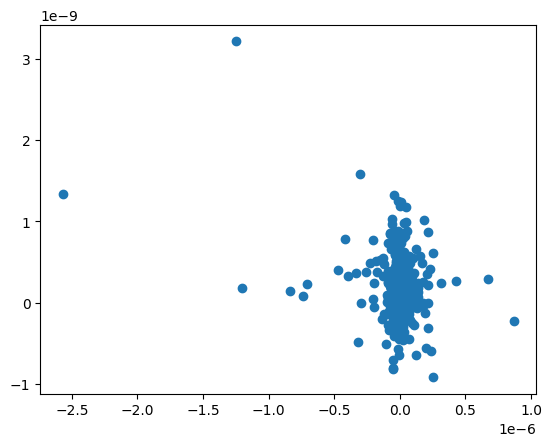

In [92]:
res = []
for i in range(1000000):
    m = np.random.rand(3)*10
    t = np.random.rand(3)*1
    C = np.random.randint(0,100,3)
    mt = m[0] + m[1] + m[2]
    tt = t[0] + t[1] + t[2]
    Ct = C[0] + C[1] + C[2]
    a = -tt
    b = -tt*mt + Ct
    c = Ct*mt - C[0]*m[0] - C[1]*m[1] - C[2]*m[2] -tt*(m[0]*m[1] + m[1]*m[2] + m[2]*m[0])
    d = C[0]*m[1]*m[2] + C[1]*m[2]*m[0] + C[2]*m[0]*m[1] - tt*m[0]*m[1]*m[2]
    
    x = cubic_root(a, b, c, d)
    res.append(a*x**3 + b*x**2 + c*x + d)
    
plt.scatter([i.real for i in res], [i.imag for i in res])
    

In [7]:
# @njit #################### needs more testing, can do without error?
def b_maxL_3(m, t, C):
    mt = m[0] + m[1] + m[2]
    tt = t[0] + t[1] + t[2]
    Ct = C[0] + C[1] + C[2]
    a = -tt
    b = -tt*mt + Ct
    c = Ct*mt - C[0]*m[0] - C[1]*m[1] - C[2]*m[2] -tt*(m[0]*m[1] + m[1]*m[2] + m[2]*m[0])
    d = C[0]*m[1]*m[2] + C[1]*m[2]*m[0] + C[2]*m[0]*m[1] - tt*m[0]*m[1]*m[2]
    D0 = b**2 - 3*a*c
    D1 = 2*b**3 - 9*a*b*c + 27*(a**2)*d
        
    if D0 == 0. and D1 == 0.:
        return -b/(3*a)
    
    C0 = ((D1 + np.sqrt(D1**2 - 4*D0**3 + 0j)) / 2)**(1/3)
    
    if C0 == 0:
        C0 = ((D1 - np.sqrt(D1**2 - 4*D0**3 + 0j)) / 2)**(1/3)
        
    x0 = -1/(3*a) * (b + C0 + D0/C0)
    
    # if x0.real < 0:
    #     return 0.
    
    return x0

In [20]:
res = []
for i in range(10000):
    m = np.random.rand(3)*10
    t = np.random.rand(3)*1
    C = np.random.randint(0,100,3)
    res.append(b_maxL_3(m, t, C))


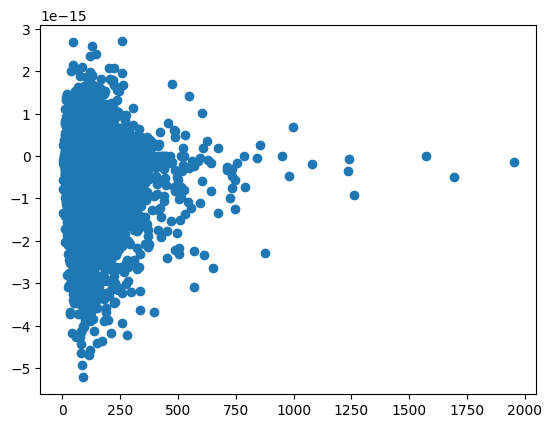

In [21]:
fig = plt.scatter(
    [i.real for i in res],
    [i.imag for i in res]
)


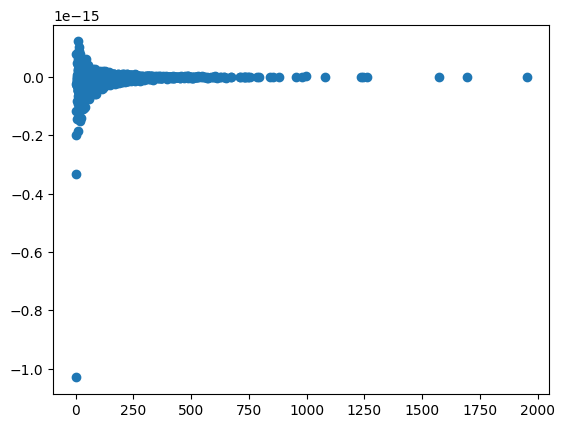

In [22]:
fig = plt.scatter(
    [i.real for i in res],
    [i.imag/i.real for i in res]
)


In [72]:
def quartic_root(A, B, C, D, E):
    alpha = -3 * B**2 / (8 * A**2) + C/A
    beta = B**3 / (8 * A**3) - B * C / (2 * A**2) + D/A
    gamma = -3 * B**4 / (256 * A**4) + C * B**2 / (16 * A**3) - B * D / (4 * A**2) + E / A
    
    if beta == 0.:
        s1 = (alpha**2 - 4*gamma)**0.5
        s2 = ((-alpha + s1) / 2)**0.5
        x = -B/(4*A) + s2
        return x
    
    P = -(alpha**2)/12 - gamma
    Q = -(alpha**3)/108 + alpha*gamma/3 - (beta**2) / 8
    R = -Q/2 + (Q**2 / 4 + P**3 / 27)**0.5
    U = R**(1/3)
    if U == 0.:
        y = -5/6*alpha - (Q**(1/3))
    else:
        y = -5/6*alpha + U - P/(3*U)
    W = (alpha + 2*y)**0.5
    
    s1 = 2*beta/W
    s2 = (-(3*alpha + 2*y + s1))**0.5
    s3 = (W + s2) / 2
    x = -B / (4*A) + s3
    return x

In [73]:
quartic_root(0.052552199685123924, -139.3620255099333, 409.3115364655596, -439.5330339980982, 155.93677904041328)


2648.9389582757926

-472.70789391176015 22.668356624904845 480.2839402715914 -12.058773841326797 40.857528437785504 (0.012438888318602659+0.34863362956629174j) (-24.62735794596925+8.881784197001252e-15j)
-232.84287906304814 381.0072316373314 435.964846663661 -403.2123266728847 232.99816787413226 2.2209973020399305 -3.475968817638204
0.0030381229005911337 456.3511343346511 50.860651405680755 119.71350717273288 -96.98596751554476 (-0.2682176261150744+0.6468121484270245j) (-1.894540411797749+4.200421737721172e-05j)
-127.13758796091099 -211.81172072148632 166.80863902919214 248.81313812883798 121.8718625673248 1.147490071195072 86.56098654228288
-0.002306159615386605 361.02768945367177 -220.2521812568237 408.79116054117355 -52.38401435501294 156548.6968626109 317.19508260302825
0.0037730634512058714 -399.33709471311954 74.20993072984675 -232.06576965293704 -375.77482745744584 105838.76967296409 3.6057243240595085
-237.29473715634788 131.873938476332 405.4916550676095 -136.25891196203264 76.69191827427642 (0.1

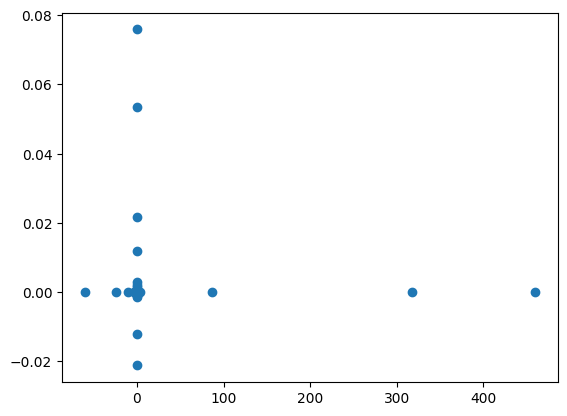

In [87]:
res = []
for i in range(1000000):
    arg = np.random.random(5)*1000-500
    A = float(arg[0])
    B = float(arg[1])
    C = float(arg[2])
    D = float(arg[3])
    E = float(arg[4])
    x = quartic_root(A, B, C, D, E)

            
    res.append(
        (A*x**4 + B*x**3 + C*x**2 + D*x + E)
    )
    if abs(res[-1]) > 1.:
        print(A, B, C, D, E, x, res[-1])
plt.scatter([i.real for i in res], [i.imag for i in res])

In [1]:
from IntegralQuery import SearchQuery, IntegralQuery, Filter, Range
from astropy.coordinates import SkyCoord

p = SkyCoord(83.6333, 22.0144, frame="icrs", unit="deg")
searchquerry = SearchQuery(position=p, radius="5 degree",)
cat = IntegralQuery(searchquerry)
f = Filter(SCW_TYPE="POINTING")
scw_ids_all = cat.apply_filter_on_revolutions(f)
for orbit, count in scw_ids_all.items():
    print(orbit, count)

0039 41
0040 19
0042 41
0043 72
0044 77
0045 19
0058 2
0102 34
0103 7
0170 30
0177 2
0225 2
0239 96
0242 1
0300 41
0301 1
0308 2
0352 33
0365 31
0422 114
0428 2
0468 2
0483 36
0541 73
0605 64
0665 66
0666 73
0727 69
0728 71
0774 45
0834 17
0835 9
0836 9
0839 74
0902 33
0912 19
0914 6
0915 8
0916 8
0917 8
0966 20
0967 38
0970 42
1019 38
1021 21
1022 11
1023 11
1024 11
1025 9
1026 13
1027 9
1028 9
1089 30
1159 56
1160 51
1221 30
1268 56
1269 53
1278 21
1327 80
1328 71
1342 22
1387 78
1444 21
1447 17
1452 16
1456 16
1461 79
1462 76
1466 16
1468 16
1504 3
1505 5
1506 4
1507 2
1508 20
1515 47
1516 37
1520 20
1524 20
1528 20
1577 15
1581 18
1589 17
1593 17
1597 17
1598 47
1599 38
1644 20
1648 16
1652 16
1657 17
1658 18
1661 42
1662 48
1664 18
1667 24
1715 16
1719 16
1723 46
1724 42
1728 16
1733 16
1736 16
1781 21
1784 49
1785 42
1789 16
1794 16
1797 16
1801 18
1850 18
1856 46
1857 42
1877 13
1921 16
1925 20
1927 44
1928 60
1930 16
1943 16
1987 34
1988 1
1991 18
1996 18
1999 40
2000 63
2010 1

In [4]:
import astropy.io.fits as fits
import numpy as np
from astropy.table import Table

In [28]:
with fits.open("sec_source_test.fits.gz") as file:
    # t = Table.read(file[1])
    # Table.remove_rows(file[1], [i for i in range(1, len(t))])
    t = file[1].data
    print(type(t))
    print(type(t[0:0]))
    file[1].data = t[0:0]


<class 'astropy.io.fits.fitsrec.FITS_rec'>
<class 'astropy.io.fits.fitsrec.FITS_rec'>


In [30]:
with fits.open("sec_source_test.fits.gz") as file:
    t = Table.read(file[1])
    # Table.remove_rows(file[1], [i for i in range(1, len(t))])
    # t = file[1].data
    # print(type(t))
    # print(type(t[0:0]))
    # file[1].data = t[0:0]
    
t

BIRD_SOURCE_ID,DAY_ID,NAME,CLASS,RA_OBJ,DEC_OBJ,ERR_RAD,ISGRI_FLAG,JEMX_FLAG,SPI_FLAG,PICSIT_FLAG,SPA_MODL,SPA_NPAR,SPA_PARS,SPE_MODL,SPE_NPAR,SPE_PARS,VAR_MODL,VAR_NPAR,VAR_PARS,COMMENTS,SPI_FLUX_1,SPI_FLUX_2,ISGR_FLUX_1,ISGR_FLUX_2,PICS_FLUX_1,PICS_FLUX_2,JEMX_FLUX_1,JEMX_FLUX_2,E_MIN,E_MAX,FLUX,FLUX_ERR,SEL_FLAG,FLAG,SOURCE_ID
,d,,,deg,deg,deg,,,,,,,,,,,,,,,ph / (cm2 s),ph / (cm2 s),ct / s,ct / s,ct / s,ct / s,ct / s,ct / s,keV,keV,ph / (cm2 s),ph / (cm2 s),,,
str16,float64,str19,uint16,float32,float32,float32,uint8,uint8,uint8,uint8,str32,uint16,float32[8],str128,uint16,float32[32],str128,uint16,float32[8],str24,float32,float32,float32,float32,float32,float32,float32,float32,float32[256],float32[256],float32[256],float32[256],uint16,int16,str19
J000000.0+000000,0.0,A0535+26a,0,84.771355,26.334742,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,A0535+26a
J000000.0+000000,0.0,Crab_Nebula,0,83.614456,22.01238,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,Crab_Nebula
J000000.0+000000,0.0,4U_0614+091,0,94.24423,9.126205,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,4U_0614+091
J000000.0+000000,0.0,IGR_J07597-3842,0,119.89097,-38.730717,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,IGR_J07597-3842
J000000.0+000000,0.0,IGR_J07565-4139,0,119.124084,-41.637386,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,IGR_J07565-4139
J000000.0+000000,0.0,4U_0836-429,0,129.36238,-42.874527,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,4U_0836-429
J000000.0+000000,0.0,IGR_J09103-3741,0,137.54057,-37.697384,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,IGR_J09103-3741
J000000.0+000000,0.0,MCG_-05-23-016,0,146.85435,-30.945707,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,MCG_-05-23-016


In [33]:
f = fits.open('sec_source_test.fits.gz', mode='update')
t = file[1].data
file[1].data = t[0:0]
f.flush()
f.close()

UnsupportedOperation: truncate

In [35]:
with fits.open("sec_source_test.fits.gz") as file:
    t = Table.read(file[1])
    # Table.remove_rows(file[1], [i for i in range(1, len(t))])
    # t = file[1].data
    # print(type(t))
    # print(type(t[0:0]))
    # file[1].data = t[0:0]
    
t

BIRD_SOURCE_ID,DAY_ID,NAME,CLASS,RA_OBJ,DEC_OBJ,ERR_RAD,ISGRI_FLAG,JEMX_FLAG,SPI_FLAG,PICSIT_FLAG,SPA_MODL,SPA_NPAR,SPA_PARS,SPE_MODL,SPE_NPAR,SPE_PARS,VAR_MODL,VAR_NPAR,VAR_PARS,COMMENTS,SPI_FLUX_1,SPI_FLUX_2,ISGR_FLUX_1,ISGR_FLUX_2,PICS_FLUX_1,PICS_FLUX_2,JEMX_FLUX_1,JEMX_FLUX_2,E_MIN,E_MAX,FLUX,FLUX_ERR,SEL_FLAG,FLAG,SOURCE_ID
,d,,,deg,deg,deg,,,,,,,,,,,,,,,ph / (cm2 s),ph / (cm2 s),ct / s,ct / s,ct / s,ct / s,ct / s,ct / s,keV,keV,ph / (cm2 s),ph / (cm2 s),,,
str16,float64,str19,uint16,float32,float32,float32,uint8,uint8,uint8,uint8,str32,uint16,float32[8],str128,uint16,float32[32],str128,uint16,float32[8],str24,float32,float32,float32,float32,float32,float32,float32,float32,float32[256],float32[256],float32[256],float32[256],uint16,int16,str19
J000000.0+000000,0.0,A0535+26a,0,84.771355,26.334742,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,A0535+26a
J000000.0+000000,0.0,Crab_Nebula,0,83.614456,22.01238,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,Crab_Nebula
J000000.0+000000,0.0,4U_0614+091,0,94.24423,9.126205,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,4U_0614+091
J000000.0+000000,0.0,IGR_J07597-3842,0,119.89097,-38.730717,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,IGR_J07597-3842
J000000.0+000000,0.0,IGR_J07565-4139,0,119.124084,-41.637386,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,IGR_J07565-4139
J000000.0+000000,0.0,4U_0836-429,0,129.36238,-42.874527,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,4U_0836-429
J000000.0+000000,0.0,IGR_J09103-3741,0,137.54057,-37.697384,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,IGR_J09103-3741
J000000.0+000000,0.0,MCG_-05-23-016,0,146.85435,-30.945707,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,MCG_-05-23-016


In [2]:
from astropy.io import fits
t = fits.open('sec_source_test.fits.gz')
tbdata = t[1].data
mask = [False for i in range(len(tbdata))]
mask[0] = True
mask[1] = True
newtbdata = tbdata[mask]
hdu = fits.BinTableHDU(data=newtbdata, name="SPI.-SRCL-CAT")
hdu.writeto('new_sec_source_test.fits.gz')

In [5]:
with fits.open("new_sec_source_test.fits.gz") as file:
    t = Table.read(file[1])
    # Table.remove_rows(file[1], [i for i in range(1, len(t))])
    # t = file[1].data
    # print(type(t))
    # print(type(t[0:0]))
    # file[1].data = t[0:0]
    
t

BIRD_SOURCE_ID,DAY_ID,NAME,CLASS,RA_OBJ,DEC_OBJ,ERR_RAD,ISGRI_FLAG,JEMX_FLAG,SPI_FLAG,PICSIT_FLAG,SPA_MODL,SPA_NPAR,SPA_PARS,SPE_MODL,SPE_NPAR,SPE_PARS,VAR_MODL,VAR_NPAR,VAR_PARS,COMMENTS,SPI_FLUX_1,SPI_FLUX_2,ISGR_FLUX_1,ISGR_FLUX_2,PICS_FLUX_1,PICS_FLUX_2,JEMX_FLUX_1,JEMX_FLUX_2,E_MIN,E_MAX,FLUX,FLUX_ERR,SEL_FLAG,FLAG,SOURCE_ID
,d,,,deg,deg,deg,,,,,,,,,,,,,,,ph / (cm2 s),ph / (cm2 s),ct / s,ct / s,ct / s,ct / s,ct / s,ct / s,keV,keV,ph / (cm2 s),ph / (cm2 s),,,
str16,float64,str19,uint16,float32,float32,float32,uint8,uint8,uint8,uint8,str32,uint16,float32[8],str128,uint16,float32[32],str128,uint16,float32[8],str24,float32,float32,float32,float32,float32,float32,float32,float32,float32[256],float32[256],float32[256],float32[256],uint16,int16,str19
J000000.0+000000,0.0,A0535+26a,0,84.771355,26.334742,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,A0535+26a
J000000.0+000000,0.0,Crab_Nebula,0,83.614456,22.01238,0.00028,1,1,1,1,,0,0.0 .. 0.0,wabs*powerlaw,3,0.26 .. 0.0,,0,0.0 .. 0.0,from Bouchet et al. 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0 .. 9500.0,1.25 .. 10000.0,0.0 .. 2.1037307e-05,0.0 .. 0.0,1,1,Crab_Nebula
